In [80]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [81]:
df = pd.read_csv(r"C:\Users\AMITHK\Downloads\Data Trained\Projects\Week 3\Insurance Claim Fraud Detection\Automobile_insurance_fraud.csv")
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [83]:
df.describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,_c39
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,0.0
mean,203.954000,38.948000,546238.648000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000,NaN
std,115.113174,9.140287,257063.005276,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861,NaN
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000,NaN
25%,115.750000,32.000000,335980.250000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000,NaN
50%,199.500000,38.000000,533135.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000,NaN
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000,NaN
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000,NaN


In [84]:
df.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

In [85]:
df = df.drop('_c39',axis=1)

In [86]:
df.nunique()

months_as_customer              391
age                              46
policy_number                  1000
policy_bind_date                951
policy_state                      3
policy_csl                        3
policy_deductable                 3
policy_annual_premium           991
umbrella_limit                   11
insured_zip                     995
insured_sex                       2
insured_education_level           7
insured_occupation               14
insured_hobbies                  20
insured_relationship              6
capital-gains                   338
capital-loss                    354
incident_date                    60
incident_type                     4
collision_type                    4
incident_severity                 4
authorities_contacted             5
incident_state                    7
incident_city                     7
incident_location              1000
incident_hour_of_the_day         24
number_of_vehicles_involved       4
property_damage             

In [87]:
# Removing Unnecessary Columns
df = df.drop(['incident_location','policy_bind_date','incident_date','auto_model','insured_occupation','policy_number','insured_hobbies','insured_zip'],axis=1)


In [88]:
df

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_relationship,...,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_year,fraud_reported
0,328,48,OH,250/500,1000,1406.91,0,MALE,MD,husband,...,1,2,YES,71610,6510,13020,52080,Saab,2004,Y
1,228,42,IN,250/500,2000,1197.22,5000000,MALE,MD,other-relative,...,0,0,?,5070,780,780,3510,Mercedes,2007,Y
2,134,29,OH,100/300,2000,1413.14,5000000,FEMALE,PhD,own-child,...,2,3,NO,34650,7700,3850,23100,Dodge,2007,N
3,256,41,IL,250/500,2000,1415.74,6000000,FEMALE,PhD,unmarried,...,1,2,NO,63400,6340,6340,50720,Chevrolet,2014,Y
4,228,44,IL,500/1000,1000,1583.91,6000000,MALE,Associate,unmarried,...,0,1,NO,6500,1300,650,4550,Accura,2009,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,OH,500/1000,1000,1310.80,0,FEMALE,Masters,unmarried,...,0,1,?,87200,17440,8720,61040,Honda,2006,N
996,285,41,IL,100/300,1000,1436.79,0,FEMALE,PhD,wife,...,2,3,?,108480,18080,18080,72320,Volkswagen,2015,N
997,130,34,OH,250/500,500,1383.49,3000000,FEMALE,Masters,other-relative,...,2,3,YES,67500,7500,7500,52500,Suburu,1996,N
998,458,62,IL,500/1000,2000,1356.92,5000000,MALE,Associate,wife,...,0,1,YES,46980,5220,5220,36540,Audi,1998,N


In [89]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

#Customer ID column
Id_col = ['policy_number']

#Target column
target_col = ['fraud_reported']

#Categorical columns
cat_cols = df.nunique()[df.nunique()<=14].keys().tolist()
cat_cols = [x for x in cat_cols if x not in target_col]

#numerical columns
num_cols = [x for x in df.columns if x not in cat_cols + target_col + Id_col]

#Binary columns with 2 values
bin_cols = df.nunique()[df.nunique() == 2].keys().tolist()

#columns more than 2 values
multi_cols = [i for i in cat_cols if i  not in bin_cols]

#Label encoding Binary columns
le = LabelEncoder()
for i in bin_cols:
    df[i] = le.fit_transform(df[i])

#Duplicating columns for the multi value columns
df = pd.get_dummies(data=df,columns = multi_cols)
df.head()

,months_as_customer,age,policy_annual_premium,insured_sex,capital-gains,capital-loss,incident_hour_of_the_day,total_claim_amount,injury_claim,property_claim,...,auto_make_Dodge,auto_make_Ford,auto_make_Honda,auto_make_Jeep,auto_make_Mercedes,auto_make_Nissan,auto_make_Saab,auto_make_Suburu,auto_make_Toyota,auto_make_Volkswagen
0,328,48,1406.91,1,53300,0,5,71610,6510,13020,...,0,0,0,0,0,0,1,0,0,0
1,228,42,1197.22,1,0,0,8,5070,780,780,...,0,0,0,0,1,0,0,0,0,0
2,134,29,1413.14,0,35100,0,7,34650,7700,3850,...,1,0,0,0,0,0,0,0,0,0
3,256,41,1415.74,0,48900,-62400,5,63400,6340,6340,...,0,0,0,0,0,0,0,0,0,0
4,228,44,1583.91,1,66000,-46000,20,6500,1300,650,...,0,0,0,0,0,0,0,0,0,0


In [90]:
df

,months_as_customer,age,policy_annual_premium,insured_sex,capital-gains,capital-loss,incident_hour_of_the_day,total_claim_amount,injury_claim,property_claim,...,auto_make_Dodge,auto_make_Ford,auto_make_Honda,auto_make_Jeep,auto_make_Mercedes,auto_make_Nissan,auto_make_Saab,auto_make_Suburu,auto_make_Toyota,auto_make_Volkswagen
0,328,48,1406.91,1,53300,0,5,71610,6510,13020,...,0,0,0,0,0,0,1,0,0,0
1,228,42,1197.22,1,0,0,8,5070,780,780,...,0,0,0,0,1,0,0,0,0,0
2,134,29,1413.14,0,35100,0,7,34650,7700,3850,...,1,0,0,0,0,0,0,0,0,0
3,256,41,1415.74,0,48900,-62400,5,63400,6340,6340,...,0,0,0,0,0,0,0,0,0,0
4,228,44,1583.91,1,66000,-46000,20,6500,1300,650,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,1310.80,0,0,0,20,87200,17440,8720,...,0,0,1,0,0,0,0,0,0,0
996,285,41,1436.79,0,70900,0,23,108480,18080,18080,...,0,0,0,0,0,0,0,0,0,1
997,130,34,1383.49,0,35100,0,4,67500,7500,7500,...,0,0,0,0,0,0,0,1,0,0
998,458,62,1356.92,1,0,0,2,46980,5220,5220,...,0,0,0,0,0,0,0,0,0,0


In [91]:
num_cols

['months_as_customer',
 'age',
 'policy_annual_premium',
 'capital-gains',
 'capital-loss',
 'incident_hour_of_the_day',
 'total_claim_amount',
 'injury_claim',
 'property_claim',
 'vehicle_claim',
 'auto_year']

In [92]:
# Scaling Numerical columns
std = StandardScaler()

scaled = std.fit_transform(df[num_cols])
scaled = pd.DataFrame(scaled, columns = num_cols)
df_new = df.copy()

df = df.drop(columns = num_cols,axis=1)
df = df.merge(scaled, left_index = True, right_index=True, how='left')

df.head()

,insured_sex,fraud_reported,policy_state_IL,policy_state_IN,policy_state_OH,policy_csl_100/300,policy_csl_250/500,policy_csl_500/1000,policy_deductable_500,policy_deductable_1000,...,age,policy_annual_premium,capital-gains,capital-loss,incident_hour_of_the_day,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year
0,1,1,0,0,1,0,1,0,0,1,...,0.990836,0.616705,1.011331,0.953851,-0.956261,0.714257,-0.189283,1.165505,0.749653,-0.183440
1,1,1,0,1,0,0,1,0,0,0,...,0.334073,-0.242521,-0.901927,0.953851,-0.524475,-1.807312,-1.363822,-1.372696,-1.823346,0.315491
2,0,0,0,0,1,1,0,0,0,0,...,-1.088913,0.642233,0.358023,0.953851,-0.668404,-0.686362,0.054644,-0.736072,-0.785565,0.315491
3,0,1,1,0,0,0,1,0,0,0,...,0.224613,0.652886,0.853388,-1.267577,-0.956261,0.403135,-0.224130,-0.219722,0.677607,1.479664
4,1,0,1,0,0,0,0,1,0,1,...,0.552994,1.341980,1.467210,-0.683741,1.202666,-1.753121,-1.257232,-1.399654,-1.768252,0.648112


In [94]:
df[df.isnull().any(axis=1)]

,insured_sex,fraud_reported,policy_state_IL,policy_state_IN,policy_state_OH,policy_csl_100/300,policy_csl_250/500,policy_csl_500/1000,policy_deductable_500,policy_deductable_1000,...,age,policy_annual_premium,capital-gains,capital-loss,incident_hour_of_the_day,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year


In [95]:
from sklearn.model_selection import train_test_split

X=df.drop(['fraud_reported'],axis=1).values

y = df['fraud_reported'].values
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)


# Logistic Regression


In [111]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

LR_model = LogisticRegression(solver='lbfgs',max_iter=1000)
LR_model.fit(X_train,y_train)

predictions = LR_model.predict(X_test)
score = LR_model.score(X_test,y_test)

print("Accuracy = " + str(score))
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test,predictions))

      

Accuracy = 0.81
[[211  26]
 [ 31  32]]
              precision    recall  f1-score   support

           0       0.87      0.89      0.88       237
           1       0.55      0.51      0.53        63

    accuracy                           0.81       300
   macro avg       0.71      0.70      0.70       300
weighted avg       0.80      0.81      0.81       300



# Random Forest Classifier


In [97]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

model_rf = RandomForestClassifier()
model_rf.fit(X_train,y_train)

predictions = model_rf.predict(X_test)
score = model_rf.score(X_test,y_test)

print("Accuracy = " + str(score))
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test,predictions))



Accuracy = 0.7866666666666666
[[210  27]
 [ 37  26]]
              precision    recall  f1-score   support

           0       0.85      0.89      0.87       237
           1       0.49      0.41      0.45        63

    accuracy                           0.79       300
   macro avg       0.67      0.65      0.66       300
weighted avg       0.77      0.79      0.78       300



# SupportVectorClassifier


In [117]:
from sklearn.svm import LinearSVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

model_svc = LinearSVC(random_state=0, tol=1e-5)
model_svc.fit(X_train,y_train)

predictions = model_svc.predict(X_test)
score = model_svc.score(X_test,y_test)

print("Accuracy = " + str(score))
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test,predictions))


Accuracy = 0.8066666666666666
[[208  29]
 [ 29  34]]
              precision    recall  f1-score   support

           0       0.88      0.88      0.88       237
           1       0.54      0.54      0.54        63

    accuracy                           0.81       300
   macro avg       0.71      0.71      0.71       300
weighted avg       0.81      0.81      0.81       300



C:\Users\AMITHK\Anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


# Decision Tree Classifier

In [100]:
from sklearn.tree import DecisionTreeClassifier

DTCmodel = DecisionTreeClassifier()
DTCmodel.fit(X_train,y_train)
predictions = DTCmodel.predict(X_test)
score = DTCmodel.score(X_test,y_test)

print("Accuracy = " + str(score))
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test,predictions))

Accuracy = 0.7666666666666667
[[200  37]
 [ 33  30]]
              precision    recall  f1-score   support

           0       0.86      0.84      0.85       237
           1       0.45      0.48      0.46        63

    accuracy                           0.77       300
   macro avg       0.65      0.66      0.66       300
weighted avg       0.77      0.77      0.77       300



In [112]:
coef = LR_model.coef_[0]
coef = [abs(number) for number in coef]
print (coef)

[0.158990635681694, 0.20079167845175278, 0.19770909281550367, 0.0035234265338523092, 0.1731636574505671, 0.17295969990293988, 0.34568251645590353, 0.12570442698591383, 0.05453887336544434, 0.1806841412489623, 0.6365299383863184, 0.2047175301090546, 0.06383267311022847, 0.6233022045057325, 0.17996764110939156, 0.012359642626897859, 0.15973108053189736, 0.7814946613277949, 0.2122955173855222, 0.41382793252430783, 0.3208788085652449, 0.31428007071109426, 0.043719876466330646, 0.10526711987850251, 0.273066786115359, 0.21583076398116632, 0.18668040297014105, 0.16149076082714708, 0.2492162278240121, 0.5043535974242723, 0.287457699428029, 0.42342189715970907, 0.0470609691953416, 0.07167136177563418, 0.007177775156299882, 0.23962339061126187, 0.2861312925270305, 0.05324483617446451, 0.2928682267857266, 0.10752547885605855, 0.4073851953685295, 0.2216016065412564, 1.9925458148858557, 0.7123322108246293, 0.7333595887851637, 0.5464131743784576, 0.024885134730629716, 0.2435337186716532, 0.059345293

In [113]:
cols=list(df.columns)
cols.index("fraud_reported")

1

In [114]:
del cols[1]
cols

['insured_sex',
 'policy_state_IL',
 'policy_state_IN',
 'policy_state_OH',
 'policy_csl_100/300',
 'policy_csl_250/500',
 'policy_csl_500/1000',
 'policy_deductable_500',
 'policy_deductable_1000',
 'policy_deductable_2000',
 'umbrella_limit_-1000000',
 'umbrella_limit_0',
 'umbrella_limit_2000000',
 'umbrella_limit_3000000',
 'umbrella_limit_4000000',
 'umbrella_limit_5000000',
 'umbrella_limit_6000000',
 'umbrella_limit_7000000',
 'umbrella_limit_8000000',
 'umbrella_limit_9000000',
 'umbrella_limit_10000000',
 'insured_education_level_Associate',
 'insured_education_level_College',
 'insured_education_level_High School',
 'insured_education_level_JD',
 'insured_education_level_MD',
 'insured_education_level_Masters',
 'insured_education_level_PhD',
 'insured_relationship_husband',
 'insured_relationship_not-in-family',
 'insured_relationship_other-relative',
 'insured_relationship_own-child',
 'insured_relationship_unmarried',
 'insured_relationship_wife',
 'incident_type_Multi-veh

In [115]:
#Sorting on Feature Importance
sorted_index = sorted(range(len(coef)),key= lambda k: coef[k], reverse = True)
for idx in sorted_index:
    print(cols[idx])

incident_severity_Major Damage
umbrella_limit_7000000
incident_severity_Total Loss
incident_severity_Minor Damage
umbrella_limit_-1000000
umbrella_limit_3000000
incident_severity_Trivial Damage
auto_make_BMW
insured_relationship_not-in-family
auto_make_Nissan
incident_state_PA
incident_state_NC
number_of_vehicles_involved_2
insured_relationship_own-child
age
umbrella_limit_9000000
collision_type_Rear Collision
incident_city_Hillsdale
auto_make_Accura
incident_state_WV
policy_csl_500/1000
property_damage_NO
umbrella_limit_10000000
insured_education_level_Associate
auto_make_Mercedes
number_of_vehicles_involved_3
incident_state_OH
incident_city_Arlington
authorities_contacted_Other
collision_type_?
insured_relationship_other-relative
incident_type_Single Vehicle Collision
bodily_injuries_2
insured_education_level_JD
months_as_customer
injury_claim
auto_make_Saab
insured_relationship_husband
authorities_contacted_Fire
witnesses_2
incident_type_Parked Car
auto_make_Suburu
incident_city_Riv

# Model(Logistic Regression)  - Evaluation Statistics

In [119]:
y_pred_prob = LR_model.predict_proba(X_test)[:,:]
y_pred_prob_df = pd.DataFrame(data=y_pred_prob , columns = ['prob of fraud_reported' , 'prob of fraud_reported'])
y_pred_prob_df.head()

,prob of fraud_reported,prob of fraud_reported
0,0.946453,0.053547
1,0.878217,0.121783
2,0.912282,0.087718
3,0.370497,0.629503
4,0.543268,0.456732


In [120]:
from sklearn.preprocessing import binarize

for i in range(0,11):
    cm2=0
    y_pred_prob_yes = LR_model.predict_proba(X_test)
    y_pred2 = binarize(y_pred_prob_yes , i/5)[:,1]
    cm2=confusion_matrix(y_test,y_pred2)
    print('With',i/10,'threshold the confusion Matrix is' , '\n', cm2 , '\n',
         'with',cm2[0,0]+cm2[1,1], 'correct predictions and', cm2[1,0],'False Negatives')

With 0.0 threshold the confusion Matrix is 
 [[  0 237]
 [  0  63]] 
 with 63 correct predictions and 0 False Negatives
With 0.1 threshold the confusion Matrix is 
 [[173  64]
 [ 22  41]] 
 with 214 correct predictions and 22 False Negatives
With 0.2 threshold the confusion Matrix is 
 [[205  32]
 [ 26  37]] 
 with 242 correct predictions and 26 False Negatives
With 0.3 threshold the confusion Matrix is 
 [[216  21]
 [ 40  23]] 
 with 239 correct predictions and 40 False Negatives
With 0.4 threshold the confusion Matrix is 
 [[227  10]
 [ 56   7]] 
 with 234 correct predictions and 56 False Negatives
With 0.5 threshold the confusion Matrix is 
 [[237   0]
 [ 63   0]] 
 with 237 correct predictions and 63 False Negatives
With 0.6 threshold the confusion Matrix is 
 [[237   0]
 [ 63   0]] 
 with 237 correct predictions and 63 False Negatives
With 0.7 threshold the confusion Matrix is 
 [[237   0]
 [ 63   0]] 
 with 237 correct predictions and 63 False Negatives
With 0.8 threshold the con

C:\Users\AMITHK\Anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass threshold=0.0 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
C:\Users\AMITHK\Anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass threshold=0.2 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
C:\Users\AMITHK\Anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass threshold=0.4 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
C:\Users\AMITHK\Anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass threshold=0.6 as keyword args. From version 0.25 passing these as positional arguments will resul

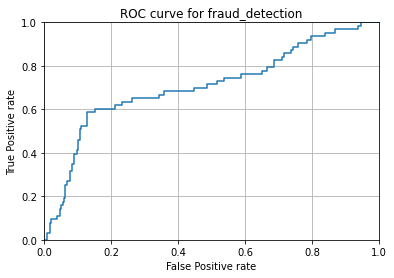

In [122]:
from sklearn.metrics import roc_curve
fpr,tpr,thresholds = roc_curve(y_test,y_pred_prob_yes[:,1])
plt.plot(fpr,tpr)
plt.xlim([0,1])
plt.ylim([0,1])
plt.title('ROC curve for fraud_detection')
plt.xlabel('False Positive rate')
plt.ylabel('True Positive rate')
plt.grid(True)